In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("dataset.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
df['Pregnancies'].value_counts()


Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [22]:

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)


In [23]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)


,Total,Percent
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

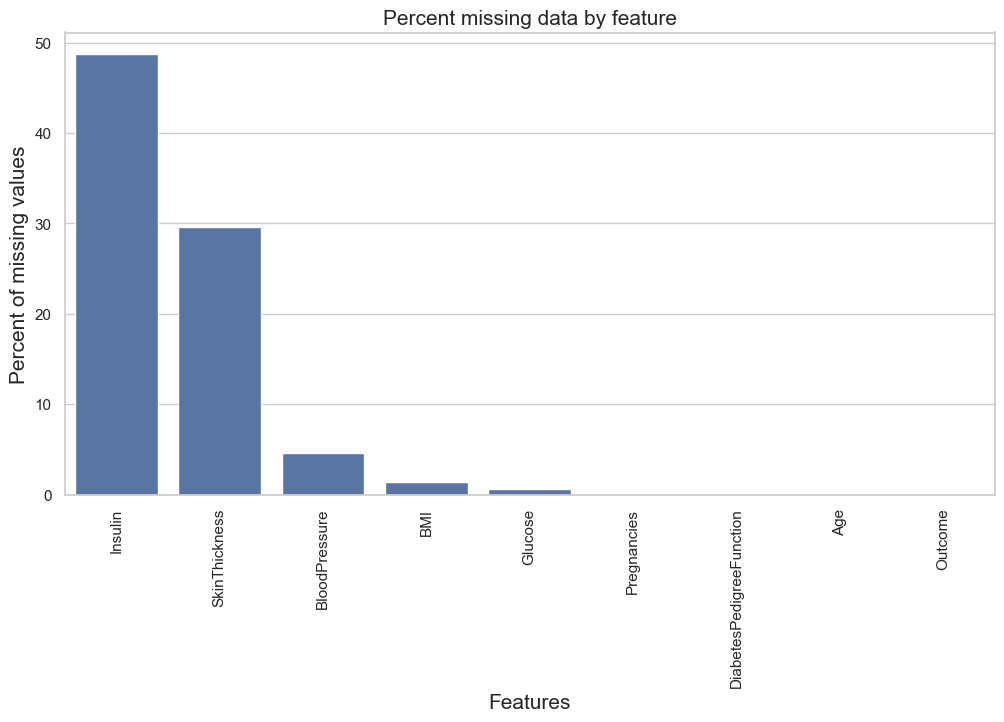

In [28]:
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


In [29]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


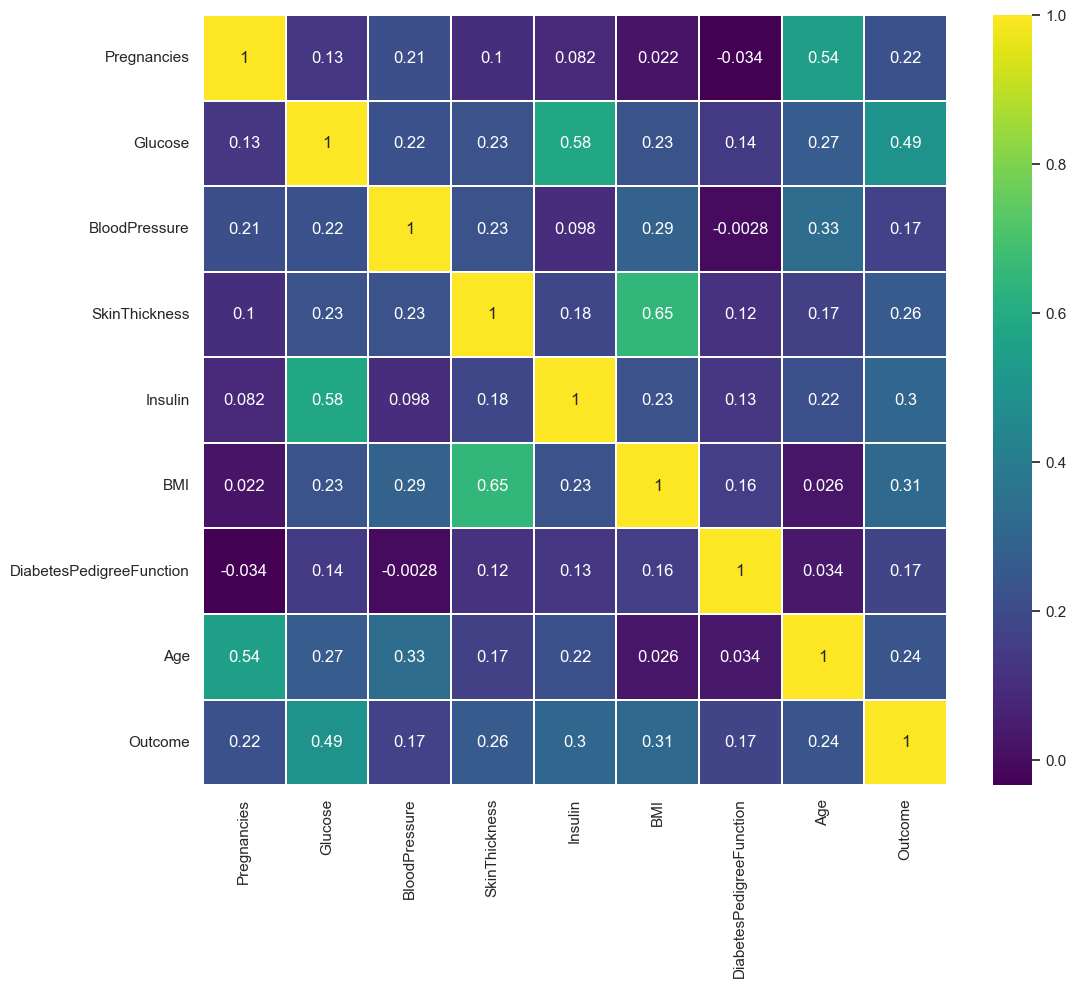

In [31]:
plt.figure(figsize=(12,10))  
sns.heatmap(df.corr(),annot=True, cmap='viridis',linewidths=.1)
plt.show()


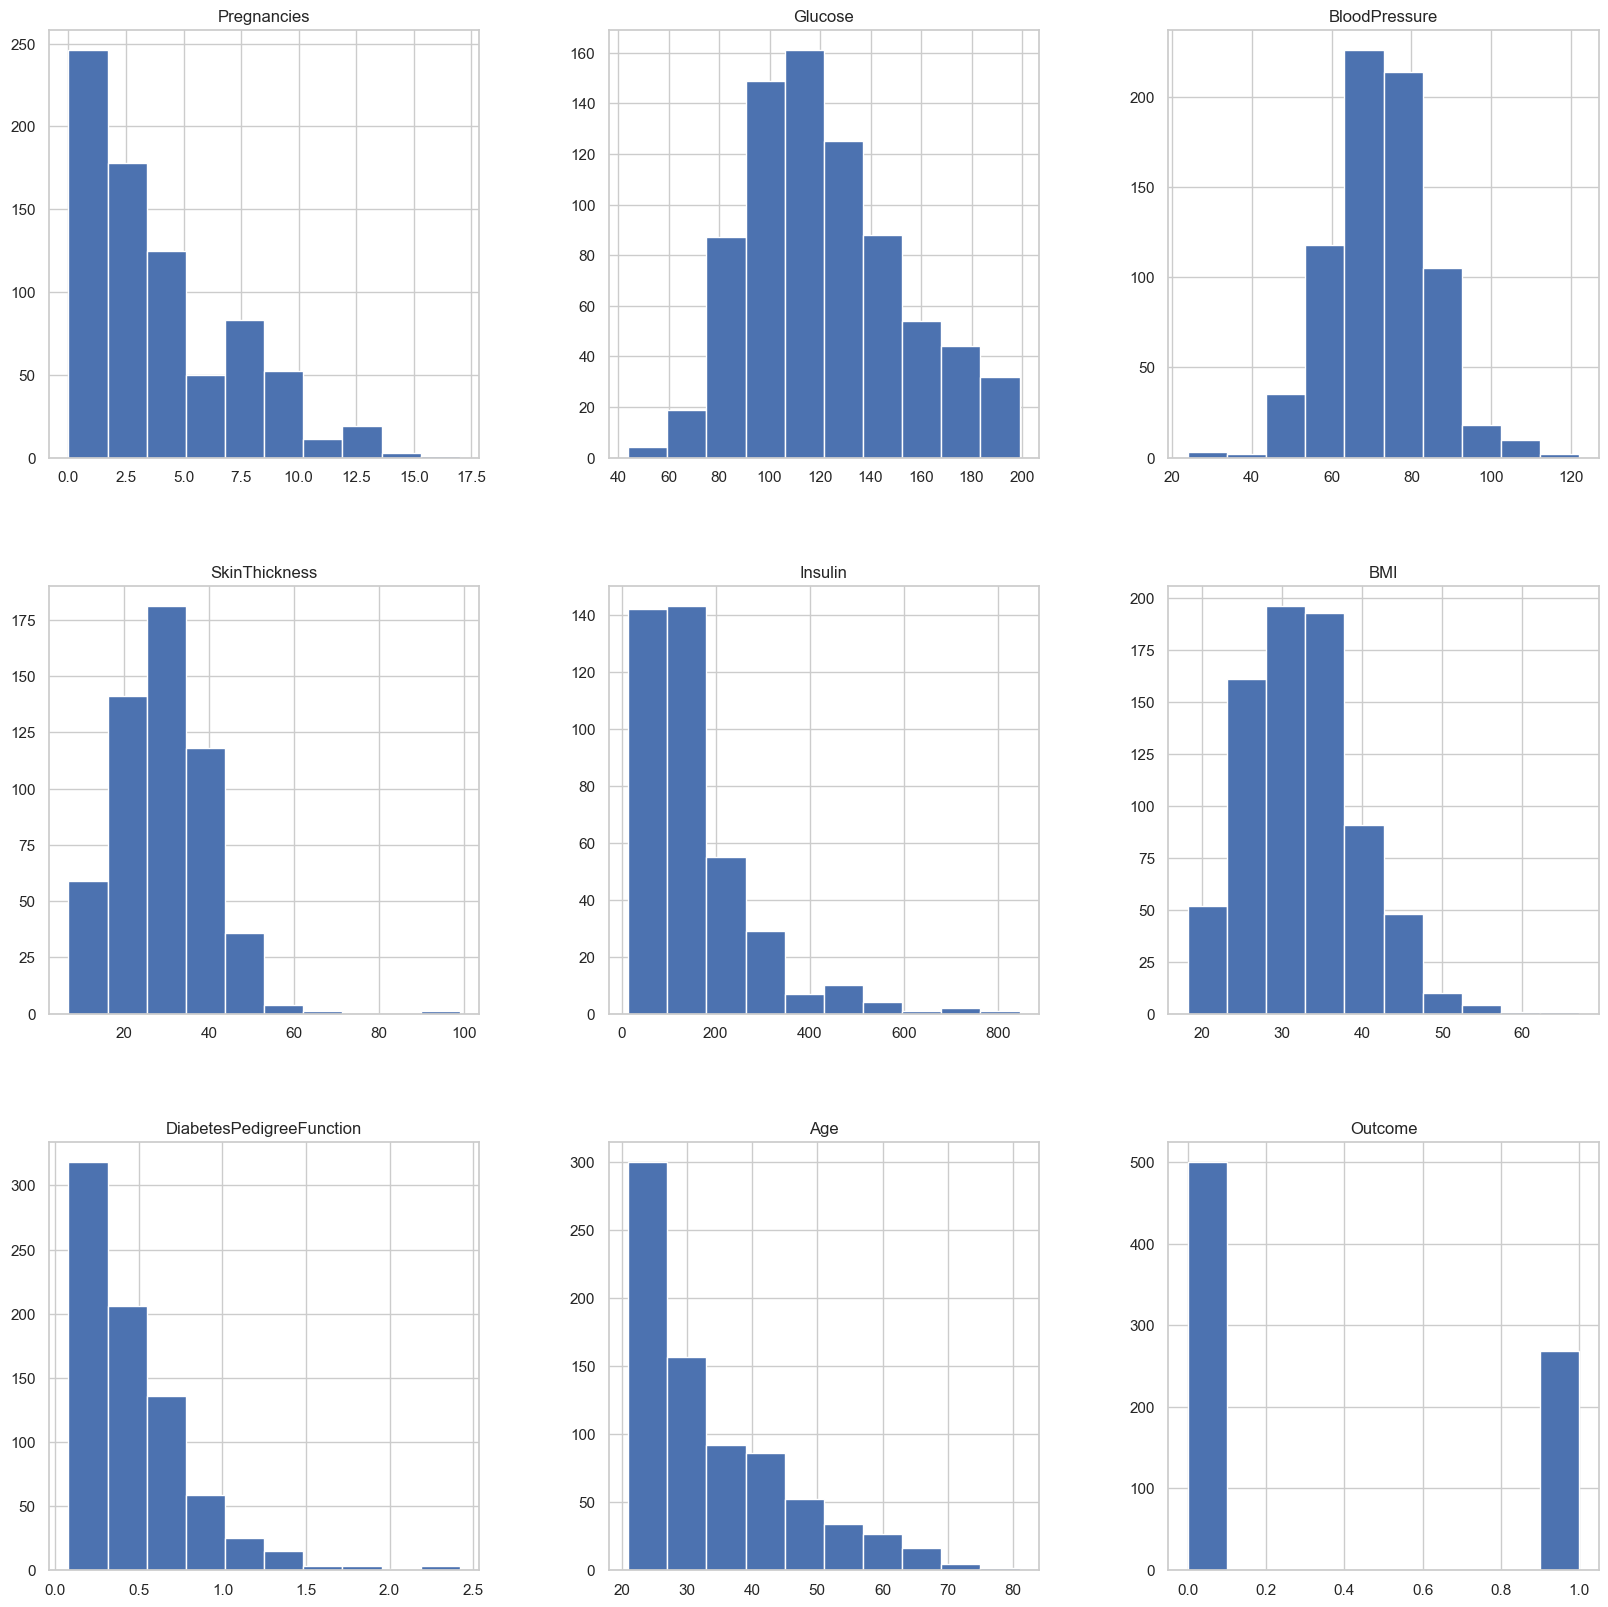

In [32]:
df.hist(figsize = (20,20))
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


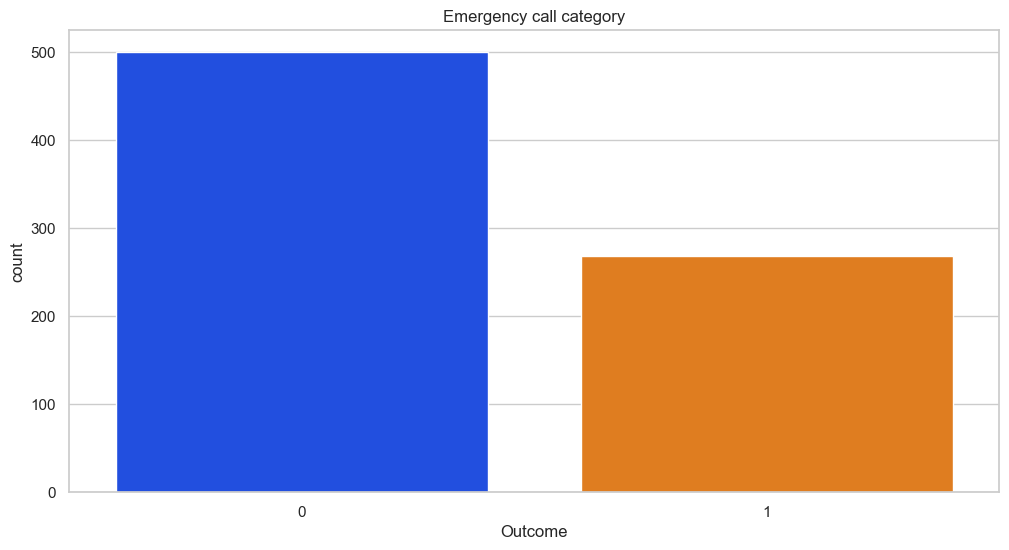

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=df, palette='bright')
plt.title("Emergency call category")

print(df['Outcome'].value_counts())


<Axes: xlabel='Pregnancies', ylabel='count'>

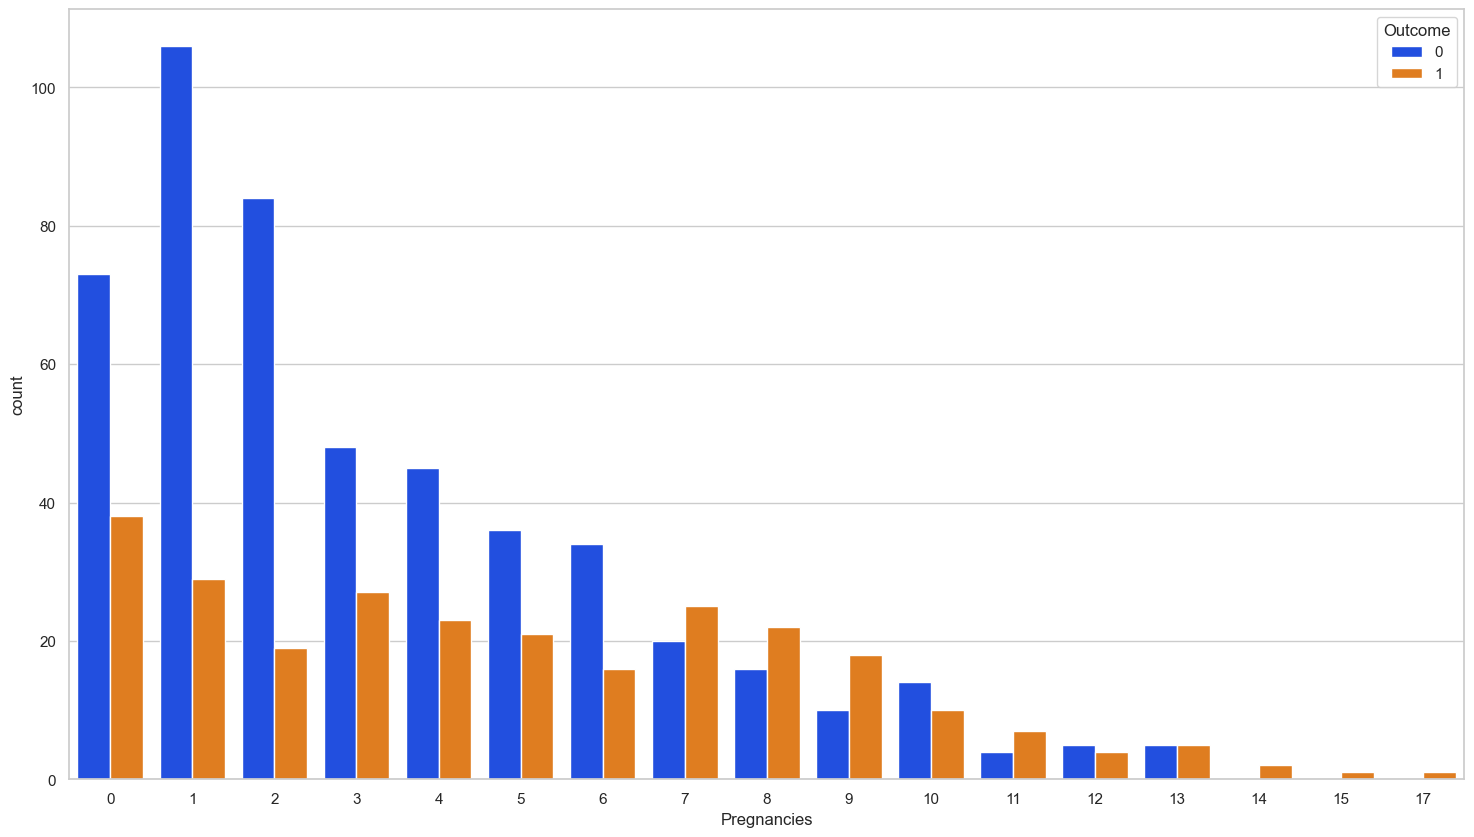

In [34]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=df,hue = 'Outcome', palette='bright')


In [35]:
normalBMIData = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

Outcome
0    101
1      7
Name: count, dtype: int64

In [36]:
df['Age'].value_counts().head()

Age
22    72
21    63
25    48
24    46
23    38
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
scaler.fit(df.drop('Outcome',axis=1))

,copy,True
,with_mean,True
,with_std,True


In [40]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [41]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


In [42]:
df_feat.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],test_size=0.30,random_state=101)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(y_test,pred))

[[127  23]
 [ 26  55]]


In [ ]:
from sklearn.metrics import classification_report


In [25]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.75      0.87      0.80        99
           1       0.67      0.47      0.55        55

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.71       154



In [26]:
from sklearn.model_selection import train_test_split

# Suppose your features are in X and target in y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
X = df.drop("Outcome", axis=1)   # all columns except Outcome
y = df["Outcome"]                # target column


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [14]:
error_rate = []
test_scores = []
train_scores = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Error Rate')

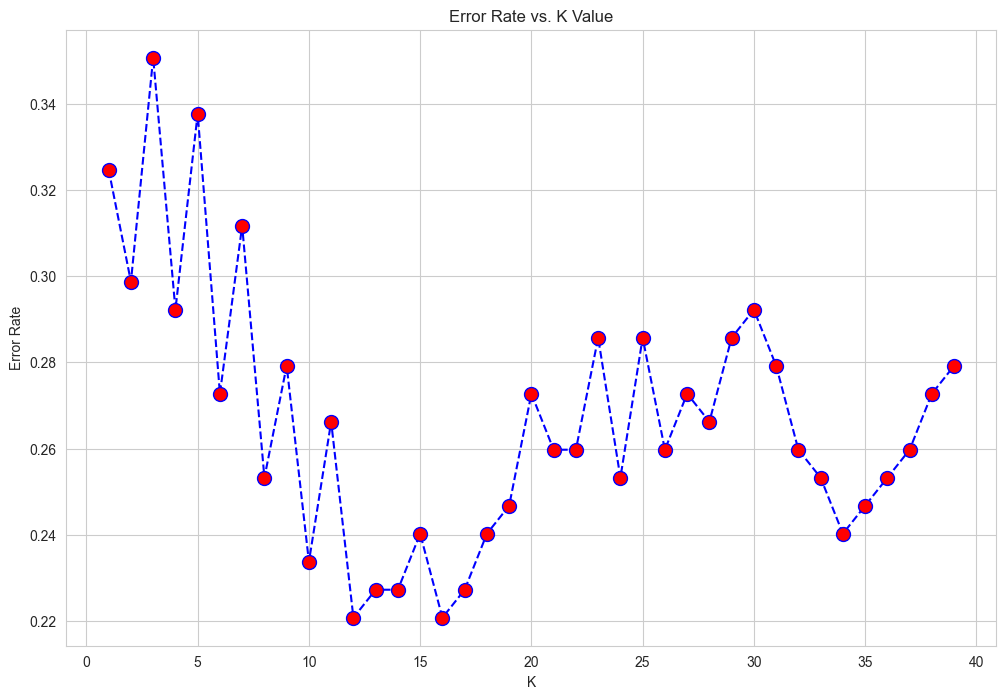

In [15]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [16]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.92207792207793 % and k = [12, 16]


In [18]:
from sklearn.metrics import confusion_matrix, classification_report


In [19]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=20


[[86 13]
 [29 26]]


              precision    recall  f1-score   support

           0       0.75      0.87      0.80        99
           1       0.67      0.47      0.55        55

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.71       154



In [20]:
knn = KNeighborsClassifier(20)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.7272727272727273

In [21]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,86,13,99
1,29,26,55
All,115,39,154


Text(0.5, 23.52222222222222, 'Predicted label')

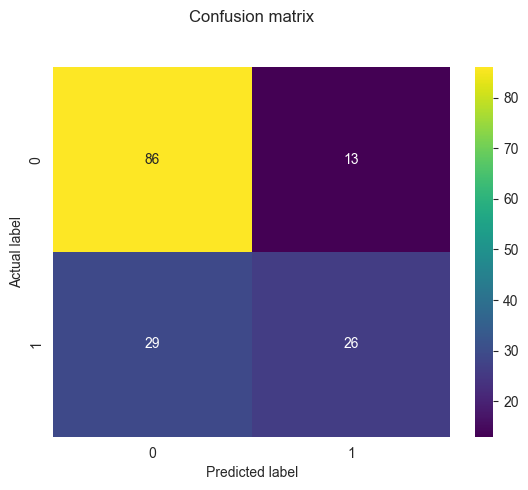

In [22]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.87      0.80        99
           1       0.67      0.47      0.55        55

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.71       154



In [24]:
from sklearn import metrics

print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Accuracy of the model : 0.727
